In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import pearsonr

In [2]:
## Import the training and test data and retain the ids for the final submission csv
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['Id']

In [3]:
test.shape

(1459, 80)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


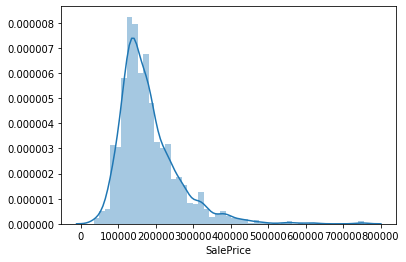

In [6]:
# Visualize the target variable
y = train['SalePrice']
sns.distplot(y)

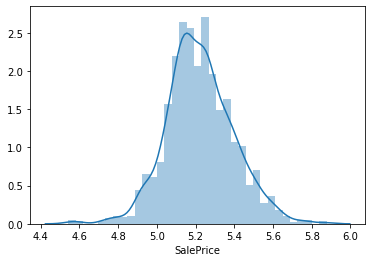

In [7]:
# Unsurprising, the distribution is right-skewed. Take the log to normalize
y = np.log10(y)
sns.distplot(y)

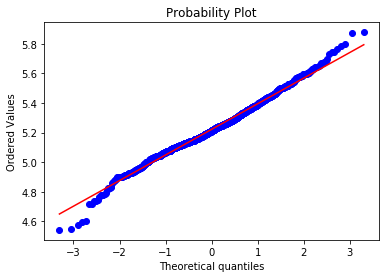

In [8]:
qq_fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

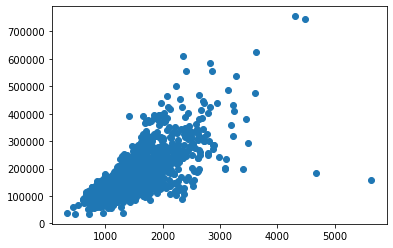

In [9]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

In [10]:
# Remove the outliers
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace = True)

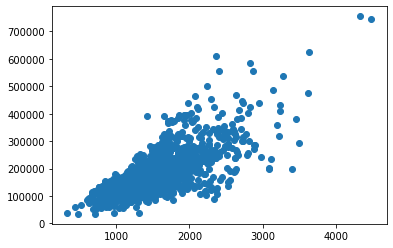

In [11]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

In [12]:
## Create full dataset for data cleaning and wrangling
all_dat = pd.concat((train, test), sort = False, ignore_index = True)
all_dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [13]:
# Drop outcome variable
all_dat.drop(['Id', 'SalePrice'], axis = 1, inplace = True)
all_dat

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [14]:
# Masonry variables
all_dat["MasVnrType"] = all_dat["MasVnrType"].fillna("None")
all_dat["MasVnrArea"] = all_dat["MasVnrArea"].fillna(0)

# Basement variables
for var in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_dat[var] = all_dat[var].fillna(0)
for var in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    all_dat[var] = all_dat[var].fillna('None')

# Garage variables
for var in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_dat[var] = all_dat[var].fillna(0)
for var in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_dat[var] = all_dat[var].fillna('None')

# Other categorical variables
for var in ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']:
    all_dat[var] = all_dat[var].fillna('None')

In [15]:
# Fill in the randomly missing variables with the mode of the neighborhood
for var in ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'Utilities']:
    all_dat[var] = all_dat.groupby(['Neighborhood', 'MSSubClass'])[var].apply(lambda x: x.fillna(x.mode()[0]))

In [16]:
# Any missing now?
missing = all_dat.apply(lambda x: x.isnull().sum()) > 0
missing = missing[missing].index
missing

Index(['LotFrontage'], dtype='object')

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# Predict lot frontage based on simple regression
X = all_dat.loc[:,('LotArea', 'Neighborhood', 'LotFrontage')].dropna()
X_pred = all_dat.loc[:,('LotArea', 'Neighborhood')]
y = X['LotFrontage']
X = X.drop(['LotFrontage'], axis = 1)
X['Neighborhood'] = LabelEncoder().fit(X['Neighborhood'].unique()).transform(X['Neighborhood'])
X_pred['Neighborhood'] = LabelEncoder().fit(X_pred['Neighborhood'].unique()).transform(X_pred['Neighborhood'])

regr = LinearRegression()
regr.fit(X, y)
preds = regr.predict(X_pred).flatten()
preds = preds[all_dat['LotFrontage'][all_dat['LotFrontage'].isnull()].index].shape

# Impute predicted values
all_dat.loc[all_dat['LotFrontage'].isnull(), 'LotFrontage'] = preds

#all_dat["LotFrontage"] = all_dat.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.median()))

In [18]:
# Feature engineering
all_dat['TotalArea'] = all_dat['1stFlrSF'] + all_dat['2ndFlrSF'] + all_dat['TotalBsmtSF']
all_dat['TotalBaths'] = all_dat['FullBath'] + (all_dat['HalfBath'] * 0.5) + all_dat['BsmtFullBath'] + (all_dat['BsmtHalfBath'] * 0.50)
all_dat['Age'] = all_dat['YrSold'] - all_dat['YearBuilt']
all_dat['New'] = np.where(all_dat['YearBuilt']>2005, 1, 0)
all_dat['Remodeled'] = np.where(all_dat['YearRemodAdd']>all_dat['YearBuilt'], 1, 0)
all_dat['Pool'] = np.where(all_dat['PoolArea']>0, 1, 0)
all_dat['OutsideArea'] = all_dat['OpenPorchSF'] + all_dat['3SsnPorch'] + all_dat['EnclosedPorch'] + all_dat['ScreenPorch'] + all_dat['WoodDeckSF']
all_dat['OverallRating'] = all_dat['OverallQual'] + all_dat['OverallCond']

In [19]:
# Labeling ordinal variables
qual = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
func = {'Typ': 0, 'Min1': 1, 'Min2': 1, 'Mod': 2, 'Maj1': 3, 'Maj2': 3, 'Sev': 4}
fin = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
bsmt_fin = {'None': 0, 'Unerenf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

qual_vars = ['BsmtCond', 'BsmtQual', 'ExterCond', 
             'ExterQual', 'FireplaceQu', 'GarageCond', 
             'GarageQual', 'HeatingQC', 'KitchenQual']

for var in qual_vars:
    all_dat[var] = all_dat[var].map(qual)
    
all_dat['Functional'] = all_dat['Functional'].map(func)
all_dat['GarageFinish'] = all_dat['GarageFinish'].map(fin)
all_dat['BsmtFinType1'] = all_dat['BsmtFinType1'].map(bsmt_fin)
all_dat['BsmtFinType2'] = all_dat['BsmtFinType2'].map(bsmt_fin)

In [20]:
#Drop variables that have little information
all_dat.drop(columns=['Street', 'Utilities', 'PoolQC'], inplace=True)

In [21]:
nominal_vars = ['Alley', 'BldgType', 'Condition1', 'Condition2', 'Electrical', 
                'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'GarageType', 
                'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSSubClass',
                'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood',
                'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'YrSold',
                'CentralAir', 'BsmtExposure', 'LandSlope', 'LotShape', 'PavedDrive',
                'YearBuilt', 'YearRemodAdd']

for var in nominal_vars:
    all_dat[var] = all_dat[var].astype(str)


one_hot = pd.get_dummies(all_dat[nominal_vars])
all_dat = pd.concat((all_dat.drop(nominal_vars, axis = 1), one_hot), sort = False, axis = 1)

In [22]:
# Normalize skewed features
cont_vars = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GrLivArea', 'LotArea', 
             'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 
             'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF']

from scipy.special import boxcox1p
skewed_cols = all_dat[cont_vars].apply(lambda x: skew(x.dropna()))
skewed_cols = skewed_cols[skewed_cols > 0.75].index
all_dat[skewed_cols] = boxcox1p(all_dat[skewed_cols], 0.15)

In [23]:
all_dat.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,...,YearRemodAdd_2001,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010
0,5.831328,19.212182,7,5,8.059126,4,3,4,3,6,...,0,0,1,0,0,0,0,0,0,0
1,6.221214,19.712205,6,8,0.000000,3,3,4,3,5,...,0,0,0,0,0,0,0,0,0,0
2,5.914940,20.347241,7,5,7.646538,4,3,4,3,6,...,0,1,0,0,0,0,0,0,0,0
3,5.684507,19.691553,7,5,0.000000,3,3,3,4,5,...,0,0,0,0,0,0,0,0,0,0
4,6.314735,21.325160,8,5,9.391827,4,3,4,3,6,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Any missing now?
missing = all_dat.apply(lambda x: x.isnull().sum()) > 0
missing = missing[missing].index
missing

Index([], dtype='object')

In [25]:
# Removing sparse variables
sparse = []

for var in all_dat.columns:
    n_zero = (all_dat[var] == 0).sum()
    if n_zero / len(all_dat) * 100 > 99.94:
        sparse.append(var)
print(sparse)
all_dat.drop(columns=sparse, inplace=True)

['Condition2_RRAe', 'Condition2_RRAn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'MSSubClass_150', 'MiscFeature_TenC', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'YearBuilt_1872', 'YearBuilt_1875', 'YearBuilt_1879', 'YearBuilt_1882', 'YearBuilt_1893', 'YearBuilt_1896', 'YearBuilt_1898', 'YearBuilt_1902', 'YearBuilt_1904', 'YearBuilt_1906', 'YearBuilt_1907', 'YearBuilt_1911', 'YearBuilt_1913']


In [26]:
from sklearn.model_selection import train_test_split
X = all_dat.iloc[:1458,:]
y = train['SalePrice']
test = all_dat.iloc[1458:,:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

y_train, y_test = np.log10(y_train), np.log10(y_test)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1093, 426)
y_train shape: (1093,)
X_test shape: (365, 426)
y_test shape: (365,)


In [27]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


def rmse(y_train, y_pred):
     return np.sqrt(mean_squared_error(y_train, y_pred))

def cv_rmse(model, X=X_train, y=y_train):    
    return np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf))

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=1491)

In [28]:
alphas = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas, random_state=1491, cv=kf))
score = cv_rmse(lasso, X=X_train, y=y_train)
score.mean()

0.04851771760330742

In [29]:
lasso.fit(X_train, y_train)
alpha = lasso.named_steps['lassocv'].alpha_
print("Best alpha :", alpha)
pred = lasso.predict(X_test)
rmse(y_test, pred)

Best alpha : 0.0003


0.04703262073595784

In [54]:
pred = lasso.predict(test)
pd.DataFrame({'Id':ids, 'SalePrice':10**pred}).to_csv('submission.csv', index = False)

In [ ]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

train_rmse = np.sqrt(-cross_val_score(lasso, X_train, y_train, scoring = scorer, cv = 10))

print("Train RMSE: ", train_rmse.mean())

pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)

In [ ]:
rmse(y_test, pred_test)

In [56]:
# xgboost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
param_grid = {
    'n_estimators': [200, 400],
    'learning_rate': [0.01, 0.1],
    'colsample_bytree': [0.7, 1],
    'max_depth': [2, 4],
    'reg_alpha': [0.01, 0.1],
    'subsample': [0.7, 0.9],
    'gamma': [0]
}

cv = 5

xgb_gs = GridSearchCV(estimator=xgb_model,
                  param_grid=param_grid, 
                  cv=cv, 
                  n_jobs=-1,
                  scoring='neg_mean_squared_error',
                  verbose=2)

xgb_fitted = xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 17.3min finished
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [57]:
# Root Mean Squared Error
print(np.sqrt(-xgb_fitted.best_score_))
print(xgb_fitted.best_params_)

0.05261476158297581
{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400, 'reg_alpha': 0.1, 'subsample': 0.9}


In [59]:
model_xgb = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate = 0.1,
    max_depth=2,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.7,
    objective='reg:squarederror',
    nthread=-1,
    seed=1491,
    reg_alpha=0.1)
score = cv_rmse(model_xgb)
score.mean()

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

0.051340258215616254

In [60]:
pred = xgb_fitted.predict(X_test)
rmse(y_test, pred)

0.049304696247213425

In [ ]:
pred = model_xgb.predict(test)
pd.DataFrame({'Id':ids, 'SalePrice':np.expm1(pred)}).to_csv('submission.csv', index = False)

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

random_grid = {'n_estimators': [10, 100, 200, 500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 5, 10, 20],
               'min_samples_split': [1, 2, 5, 10],
               'min_samples_leaf': [1, 2, 4, 10]}

rf = RandomForestRegressor()
rf_gs = GridSearchCV(estimator=rf,
                  param_grid=random_grid, 
                  cv=5, 
                  n_jobs=-1,
                  scoring='neg_mean_squared_error',
                  verbose=2)

rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)

In [ ]:
score

In [ ]:
pred = rf_gs.predict(X_test)
rmse(y_test, pred)

In [ ]:
print(fitted_model.best_params_)
pred = fitted_model.predict(X_test)
rmse(y_test, pred)

In [ ]:
lasso.named_steps

In [ ]:
all_dat.columns